<a href="https://colab.research.google.com/github/natthanich/Project_Deep_Tooth/blob/main/Regress5_Predict_Unfreeze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##เรียกใช้ CSV

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [26]:
import pandas as pd
import numpy as np

In [27]:
import os
%cd /content
if not os.path.isdir("efficientnet_keras_transfer_learning"):
 !git clone https://github.com/Wanita-8943/efficientnet_keras_transfer_learning
%cd efficientnet_keras_transfer_learning/

/content
/content/efficientnet_keras_transfer_learning


In [28]:
import sys
sys.path.append('/content/drive/MyDrive/All_Data_Project/cut_panoramic/Model/Regression/5Re_All_1G_1e-4_16_0.2_250_New_Unfreez.h5')

from efficientnet.layers import Swish, DropConnect
from efficientnet.model import ConvKernalInitializer
from tensorflow.keras.utils import get_custom_objects

get_custom_objects().update({
    'ConvKernalInitializer': ConvKernalInitializer,
    'Swish': Swish,
    'DropConnect':DropConnect
})

In [29]:
from tensorflow.keras.models import load_model
model = load_model('/content/drive/MyDrive/All_Data_Project/cut_panoramic/Model/Regression/5Re_All_1G_1e-4_16_0.2_250_New_Unfreez.h5')
height = width = model.input_shape[1]

In [30]:
df = pd.read_csv (f'/content/drive/MyDrive/All_Data_Project/cut_panoramic/Data/All_Re.csv')
df

,Fig_Age,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
0,1,7,Y07F,1,V1.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
1,2,7,Y07F,1,Flip_V1.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
2,3,7,Y07F,1,V2.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
3,4,7,Y07F,1,Flip_V2.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
4,5,7,Y07F,1,V3.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
...,...,...,...,...,...,...,...,...
4745,121,25,Y25M,19,Flip_J463.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Male,Both
4746,122,25,Y25M,19,J464.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Male,Both
4747,123,25,Y25M,19,Flip_J464.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Male,Both
4748,124,25,Y25M,19,J465.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Male,Both


In [31]:
train = df[df['Fig_Age'].between(1,75)]
test = df[df['Fig_Age'].between(101,125)]

In [32]:
DATA_PATH = "/content/drive/MyDrive/All_Data_Project/TVT_Gender"
os.chdir(DATA_PATH)
train_dir = os.path.join(DATA_PATH, 'train')
print(train_dir)
test_dir = os.path.join(DATA_PATH, 'test')
print(test_dir)

/content/drive/MyDrive/All_Data_Project/TVT_Gender/train
/content/drive/MyDrive/All_Data_Project/TVT_Gender/test


In [33]:
# base_dir = '/content/drive/MyDrive/TVT_Gender'
# os.makedirs(base_dir, exist_ok=True)

# # Directories for our training,
# # validation and test splits
# train_dir = os.path.join(base_dir, 'train')
# os.makedirs(train_dir, exist_ok=True)
# validation_dir = os.path.join(base_dir, 'validation')
# os.makedirs(validation_dir, exist_ok=True)
# test_dir = os.path.join(base_dir, 'test')
# # os.makedirs(test_dir, exist_ok=True)

In [34]:
batch_size = 16

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255, #โมเดลส่วนใหญ่ต้องใช้ RGB ในช่วง 0–1
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
        dataframe = train,
        directory = train_dir,
        x_col = 'Path_filename',
        y_col = 'Age(year)',
        # รูปภาพทั้งหมดจะถูกปรับขนาดตามความสูงและความกว้างของเป้าหมาย
        target_size=(height, width),
        batch_size=batch_size,
        # Since we use categorical_crossentropy loss, we need categorical labels
        #เนื่องจากเราใช้ categorical_crossentropy loss เราจึงต้องมีป้ายกำกับตามหมวดหมู่
        class_mode = 'other')

#label
# labels = (train_generator.class_indices)
# labels = dict((v,k) for k,v in labels.items())
# print(labels)

Found 2850 validated image filenames.


In [35]:
test = df[df['Fig_Age'].between(101,125)]
test

,Fig_Age,Age(year),Class,Class_Re,Filename,Path_filename,Sex,Floder
100,101,7,Y07F,1,V67.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
101,102,7,Y07F,1,Flip_V67.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
102,103,7,Y07F,1,V68.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
103,104,7,Y07F,1,Flip_V68.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
104,105,7,Y07F,1,V69.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Female,Both
...,...,...,...,...,...,...,...,...
4745,121,25,Y25M,19,Flip_J463.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Male,Both
4746,122,25,Y25M,19,J464.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Male,Both
4747,123,25,Y25M,19,Flip_J464.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Male,Both
4748,124,25,Y25M,19,J465.jpg,/content/drive/My Drive/All_Data_Project/TVT_G...,Male,Both


In [36]:
act = test['Age(year)'].tolist() #ค่าจริง
path = test['Path_filename'].tolist() #path

In [37]:
from tensorflow.keras.preprocessing import image

def predict_image(img_path):
    # Read the image and resize it
    img = image.load_img(img_path, target_size=(height, width)) #รูปทุกรูปมีขนาดไม่เท่ากันจึงตั้งไว้ว่าเวลาจะให้ model ดึงรูปมาทำนายให้ดึงรูปเข้ามาตามขนาดที่ตั้งไว้ตามพารามิตเตอร์
    # Convert it to a Numpy array with target shape.
    x = image.img_to_array(img)  #model ไม่สามารถทำนายรูปภาพโดยตรงได้ จึงเเปลงรูปภาพให้เป็น array เเล้วให้โมเดลทำนาย
    # Reshape
    x = x.reshape((1,) + x.shape) # เพิ่ม ไดเมนชั่นของโมเดล ให้เป็น 4 ได้ เมนชั่น โดยที่ 1, คือบอกให้โมเดลนำเข้าทีละ 1 รูปเเล้วค่อยทำนาย เเละ + ไดเมนชั่น คือ 150 ,150 ,3(สีของ RGB)
    x /= 255.
    result = model.predict([x])
    return result[0]

In [38]:
predict_image(path[0])[0]

1/1 [==============================] - 2s 2s/step


7.3607054

In [39]:
#Predict
pred_list = list()
prob_list = list()
img_path= path
for i in range(0,len(img_path)):
    predict = predict_image(img_path[i])
    result = predict[0]
    pred_list.append(result)
    # prob_list.append(predict[result])

1/1 [==============================] - 0s 48ms/step


In [40]:
pred_list

[7.3607054,
 7.354512,
 7.353852,
 7.3538523,
 7.3542914,
 7.353895,
 7.35404,
 7.354129,
 7.3539534,
 7.353904,
 7.3674555,
 7.3538733,
 7.354043,
 7.3538585,
 7.3539,
 7.3538704,
 7.353882,
 7.353853,
 7.353869,
 7.3540273,
 7.3539243,
 7.353859,
 7.3538523,
 7.3538523,
 7.353858,
 7.987859,
 7.8823752,
 7.501692,
 7.8322353,
 7.6241474,
 7.654097,
 8.461895,
 8.295707,
 7.3781385,
 7.4321594,
 7.8805714,
 7.7799835,
 8.204412,
 8.448314,
 7.696657,
 8.008479,
 7.842299,
 8.397944,
 8.707735,
 8.52407,
 8.734069,
 8.6925745,
 7.3815355,
 7.449496,
 9.175507,
 9.144545,
 9.831718,
 9.010622,
 8.497217,
 9.597305,
 9.914416,
 8.430096,
 8.904429,
 9.512867,
 9.744693,
 8.161802,
 7.864958,
 8.608862,
 8.978394,
 9.002138,
 8.658366,
 8.892851,
 9.365957,
 9.5909195,
 8.505613,
 8.179398,
 9.130404,
 8.988954,
 8.640529,
 9.176705,
 9.273371,
 9.755458,
 9.598795,
 10.03456,
 9.608254,
 8.405745,
 8.457893,
 8.511542,
 9.06489,
 9.709152,
 9.789838,
 8.9911175,
 8.291749,
 9.423667,
 9.

In [41]:
print(type(pred_list))

<class 'list'>


In [42]:
pred_int = np.around(pred_list)

In [43]:
pred = np.array(pred_int) #แปลงเป็น array
act = np.array(act)

In [44]:
pred

array([ 7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,
        7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  7.,  8.,
        8.,  8.,  8.,  8.,  8.,  8.,  8.,  7.,  7.,  8.,  8.,  8.,  8.,
        8.,  8.,  8.,  8.,  9.,  9.,  9.,  9.,  7.,  7.,  9.,  9., 10.,
        9.,  8., 10., 10.,  8.,  9., 10., 10.,  8.,  8.,  9.,  9.,  9.,
        9.,  9.,  9., 10.,  9.,  8.,  9.,  9.,  9.,  9.,  9., 10., 10.,
       10., 10.,  8.,  8.,  9.,  9., 10., 10.,  9.,  8.,  9., 10.,  9.,
        9.,  8.,  8.,  9.,  9.,  8.,  8.,  9.,  9., 10., 10., 10., 10.,
       10., 10., 10.,  9.,  9., 11., 10., 11., 12., 11., 11., 10., 10.,
       10., 10., 11., 11., 11., 11., 12., 11., 11., 12., 11., 11., 10.,
       11., 12., 12., 12., 10., 11., 10., 11., 12., 12., 12., 11., 11.,
       11., 11., 12., 11., 12., 10., 12., 12., 12., 12., 13., 13., 13.,
       10., 10., 13., 14., 12., 12., 12., 12., 12., 12., 11., 12., 14.,
       12., 11., 12., 12., 13., 12., 15., 12., 12., 17., 15., 13

#confusion_matrix

In [45]:
import numpy as np
from sklearn.metrics import confusion_matrix

# act = data_train['class'].array
# pred = data_train['category_ov'].array

cmat = confusion_matrix(act, pred)
print('classifier accuracy = {}%'.format((100.*np.trace(cmat))/(np.sum(cmat))))

#Marking the Confusion Matrix
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(act, pred))#performance

classifier accuracy = 26.842105263157894%
              precision    recall  f1-score   support

           7       0.85      1.00      0.92        50
           8       0.50      0.66      0.57        50
           9       0.39      0.50      0.44        50
          10       0.25      0.28      0.27        50
          11       0.32      0.42      0.37        50
          12       0.26      0.40      0.31        50
          13       0.25      0.26      0.26        50
          14       0.13      0.12      0.12        50
          15       0.19      0.18      0.19        50
          16       0.12      0.10      0.11        50
          17       0.27      0.26      0.26        50
          18       0.22      0.16      0.18        50
          19       0.17      0.20      0.19        50
          20       0.06      0.08      0.07        50
          21       0.14      0.20      0.16        50
          22       0.11      0.10      0.11        50
          23       0.18      0.18      

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 76.24999999999999, 'Predicted label')

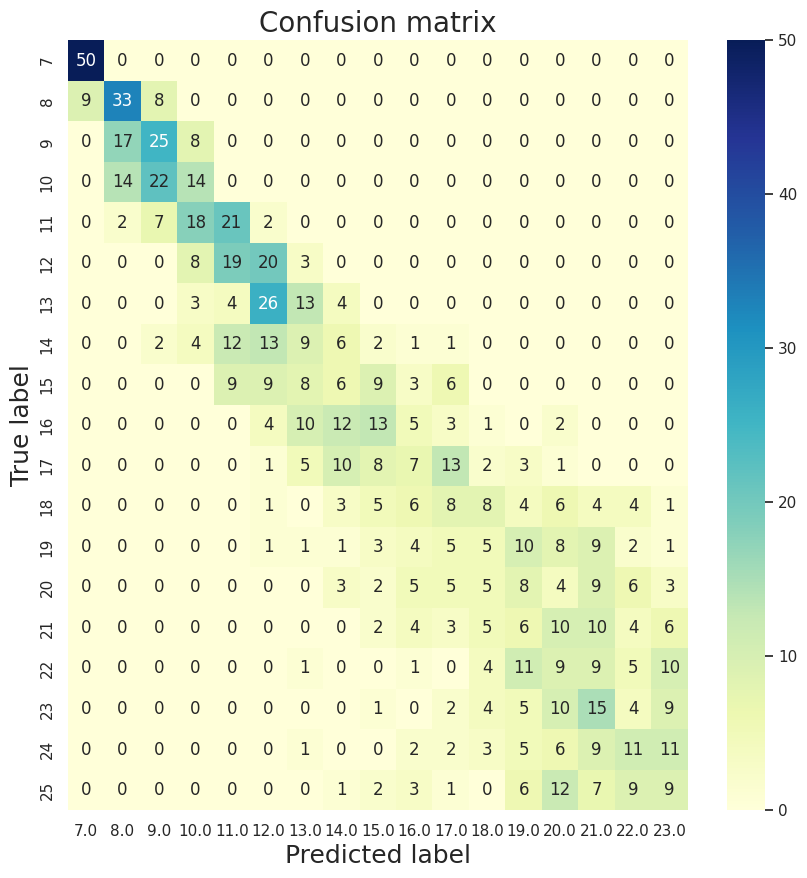

In [46]:
#create CF 
data = {'Actual': act,'Predicted' : pred}
df = pd.DataFrame(data, columns=['Actual','Predicted'])
conf_mat = pd.crosstab(df['Actual'],df['Predicted'],rownames=['Actual'],colnames=['Predicted'])

#Confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(act, pred)

#plot Confusion matrix
import seaborn as sns
sns.set()
fig, ax = plt.subplots(figsize=(10, 10))

ax = sns.heatmap(conf_mat, annot=True, fmt="d", cmap="YlGnBu") #Blues,Oranges,Reds
ax.set_title('Confusion matrix',fontsize=20)
ax.set_ylabel('True label',fontsize=18)
ax.set_xlabel('Predicted label',fontsize=18)

In [47]:
# from sklearn import metrics

#MSE and MAE

In [48]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
  
mae = mean_absolute_error(act,pred)
mse = mean_squared_error(act,pred)
rmse = mean_squared_error(act,pred,squared=False)

print("MAE:",mae)
print("MSE:",mse)
print("RMSE:",rmse)

MAE: 1.723157894736842
MSE: 6.011578947368421
RMSE: 2.4518521463107072
